<a href="https://colab.research.google.com/github/yasnilamw/MSIB-K2-KelasAwanPintar/blob/main/01_10_2401_Non_Hierarchical_Clustering_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

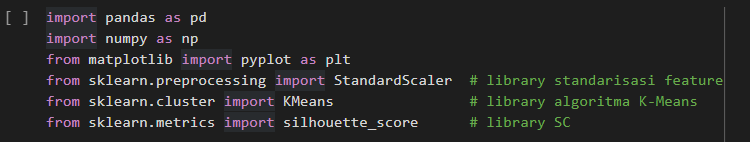

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler       # library standarisasi feature
from sklearn.cluster import KMeans                     # library algoritma K-Means
from sklearn.metrics import silhouette_score           # library SC


Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

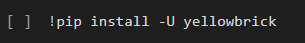

In [ ]:
!pip install -U yellowbrick


Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

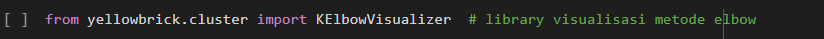

In [ ]:
from yellowbrick.cluster import KElbowVisualizer  # library visualisasi metode elbow

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


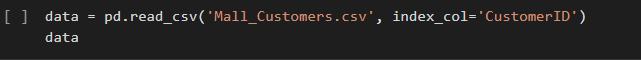

In [ ]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.head()


,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Memeriksa kelengkapan dataset.

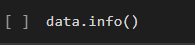

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

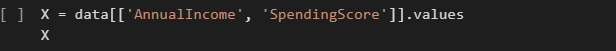

In [ ]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

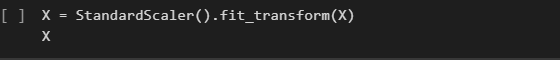

In [ ]:
x = StandardScaler().fit_transform(X)


# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



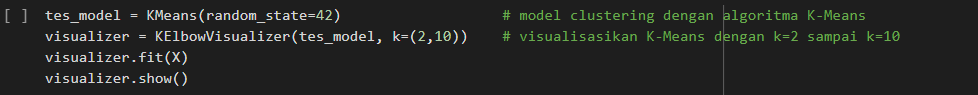

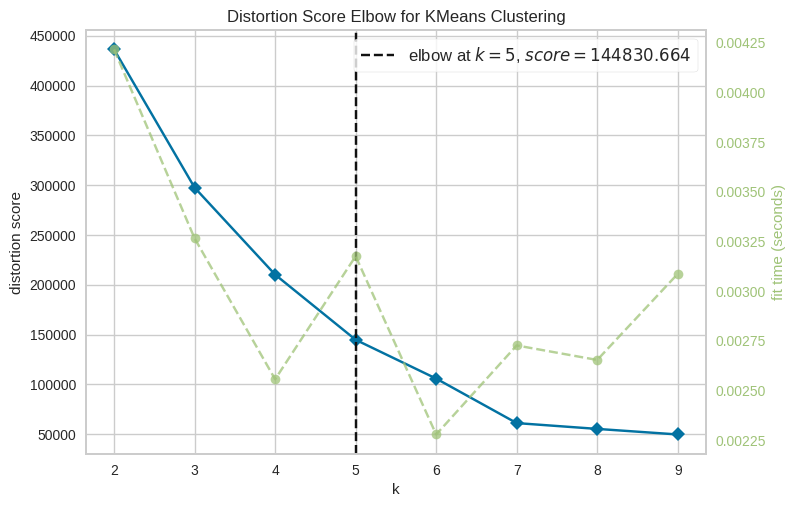

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
tes_model = KMeans(random_state=42)                # model clustering dengan algoritma K-Means
visualizer = KElbowVisualizer(tes_model, k=(2,10)) #visualisasikan K-Means dengan k-2 sampai k-10
visualizer.fit(X)
visualizer.show()


Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

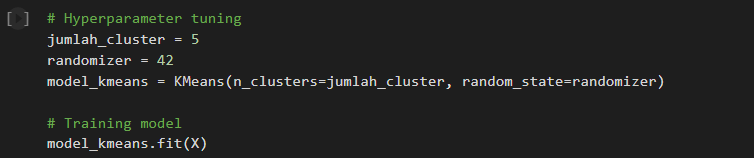

In [ ]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

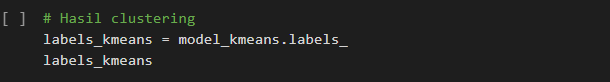

In [ ]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 3, 0, 3, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

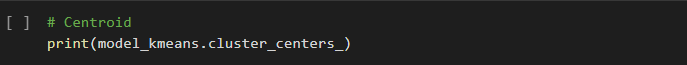

In [ ]:
# Centroid
print(model_kmeans.cluster_centers_)


[[  87.29268293   19.2195122 ]
 [1167.           48.5       ]
 [  45.75         59.11607143]
 [  91.47826087   90.34782609]
 [  27.24324324   20.94594595]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

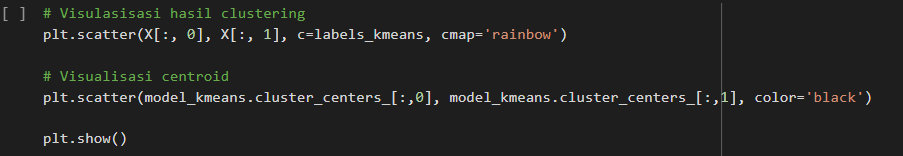

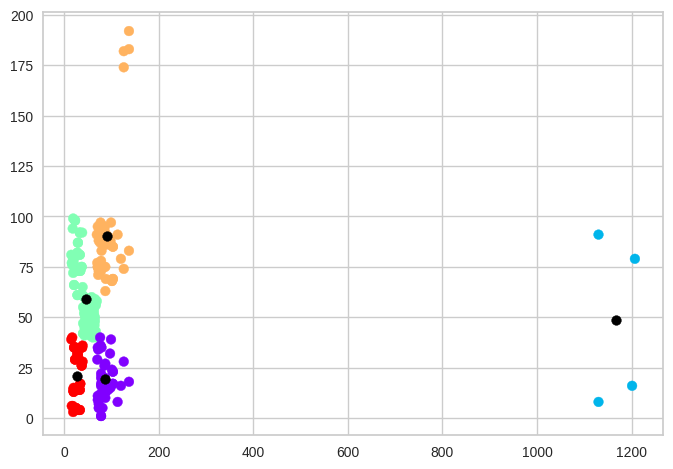

In [ ]:
# Visulasisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

#Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()


Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

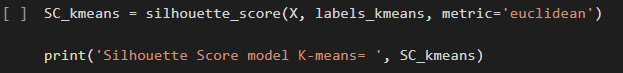

In [ ]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhoutte Score model K-means= ', SC_kmeans)


Silhoutte Score model K-means=  0.47241387889324893


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

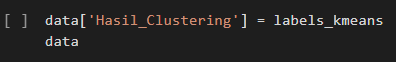

In [ ]:
data['Hasil_Clustering'] = labels_kmeans
data


,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,3
211,Male,32,126,174,3


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

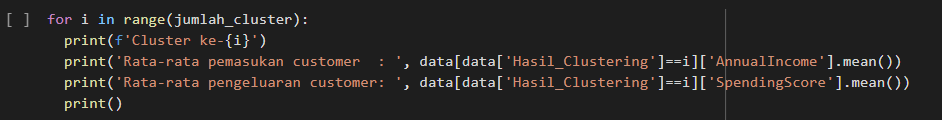

In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer ; ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer ; ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer ;  87.8
Rata-rata pengeluaran customer ;  18.7

Cluster ke-1
Rata-rata pemasukan customer ;  1167.0
Rata-rata pengeluaran customer ;  48.5

Cluster ke-2
Rata-rata pemasukan customer ;  45.93805309734513
Rata-rata pengeluaran customer ;  58.94690265486726

Cluster ke-3
Rata-rata pemasukan customer ;  91.47826086956522
Rata-rata pengeluaran customer ;  90.34782608695652

Cluster ke-4
Rata-rata pemasukan customer ;  27.243243243243242
Rata-rata pengeluaran customer ;  20.945945945945947



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [ ]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('Mall_Customers.csv')

# Memilih fitur yang relevan
features = data[['Age', 'AnnualIncome', 'SpendingScore']]

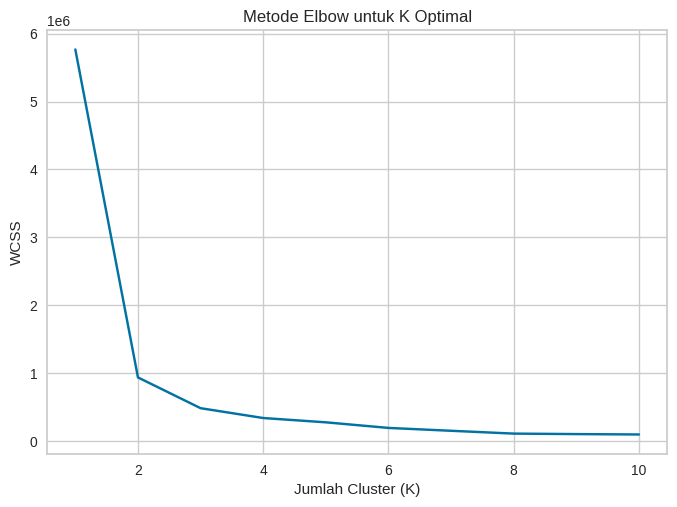

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss)
plt.title('Metode Elbow untuk K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k = 5  # Contoh nilai berdasarkan metode elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
features['KMeans_Cluster'] = kmeans.fit_predict(features)

<ipython-input-37-5e3c642f2029>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['KMeans_Cluster'] = kmeans.fit_predict(features)


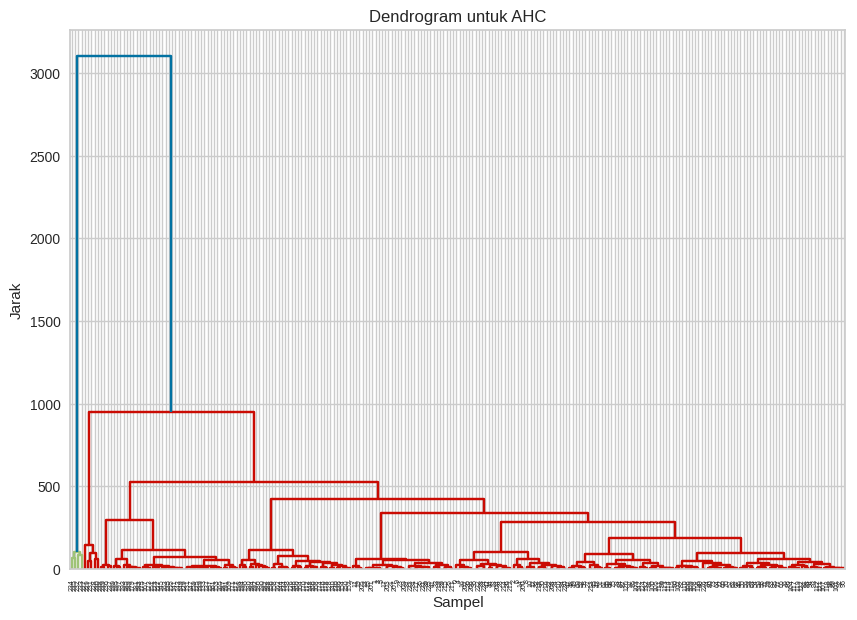

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Menghasilkan matriks linkage
Z = linkage(features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram untuk AHC')
plt.xlabel('Sampel')
plt.ylabel('Jarak')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ahc = AgglomerativeClustering(n_clusters=optimal_k)  # Gunakan optimal_k dari analisis dendrogram
features['AHC_Cluster'] = ahc.fit_predict(features)

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_sc = silhouette_score(features[['Age', 'AnnualIncome', 'SpendingScore']], features['KMeans_Cluster'])
ahc_sc = silhouette_score(features[['Age', 'AnnualIncome', 'SpendingScore']], features['AHC_Cluster'])

print(f'Silhouette Coefficient untuk K-Means: {kmeans_sc}')
print(f'Silhouette Coefficient untuk AHC: {ahc_sc}')

Silhouette Coefficient untuk K-Means: 0.32585916850020785
Silhouette Coefficient untuk AHC: 0.3853135187346984


jika satu model memiliki SC yang secara signifikan lebih besar atau lebih tinggi daripada yang lain, maka dapat disimpulkan bahwa itu merupakan metode clustering yang lebih unggul untuk dataset saat ini

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Melihat 5 baris pertama dari dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
# Menerapkan algoritma K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Menambahkan hasil clustering ke dataframe
df['cluster'] = kmeans.labels_

# Melihat hasil clustering
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1


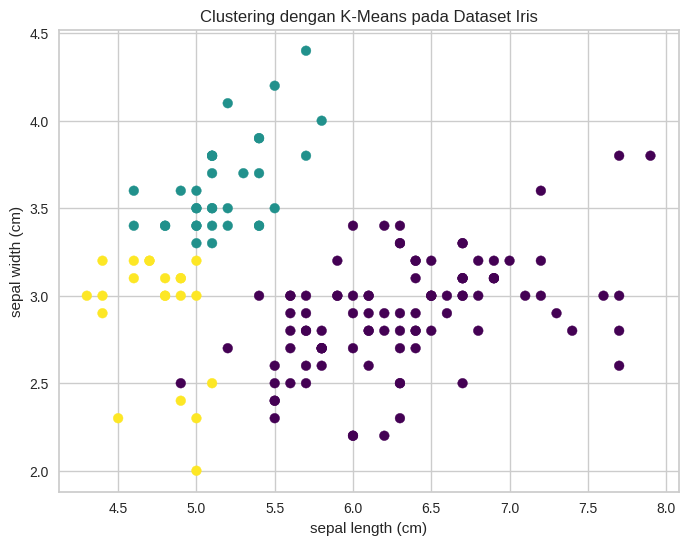

In [ ]:
# Visualisasi hasil clustering (menggunakan 2 fitur pertama)
plt.figure(figsize=(8, 6))
plt.scatter(df[iris.feature_names[0]], df[iris.feature_names[1]], c=df['cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Clustering dengan K-Means pada Dataset Iris')
plt.show()


In [ ]:
# Melihat nilai inertia (pengukuran seberapa baik data dikelompokkan)
print(f"Inertia: {kmeans.inertia_}")



Inertia: 191.02473685317958


In [ ]:
#Kesimpulan Clustering
Jumlah Cluster: Dalam kasus ini, kita menggunakan 3 cluster karena dataset Iris memiliki 3 kategori.
Hasil Clustering: Dataset di-cluster berdasarkan kemiripan data, dan setiap titik data dikelompokkan ke dalam salah satu dari 3 cluster.
Visualisasi: Visualisasi menunjukkan distribusi data dalam dua dimensi (meskipun sebenarnya datanya berada di ruang 4 dimensi).